# Light Gradient Boosting Machine Regression (LGBMRegressor)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
# Veri seti oluşturalım.
np.random.seed(42)

speed = np.random.randint(60, 200, size=100)
fuel_efficiency = np.random.uniform(5, 15, size=100)

data = pd.DataFrame({
    'Speed': speed,
    'Fuel Efficiency': fuel_efficiency
})
data.head()

,Speed,Fuel Efficiency
0,162,14.717121
1,152,13.489138
2,74,12.217295
3,166,7.359849
4,131,7.560683


# Veri Analizi

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed,100.0,128.350000,40.919081,61.000000,95.500000,123.500000,162.250000,198.000000
Fuel Efficiency,100.0,9.878712,2.772329,5.005204,7.461884,9.728354,11.959357,14.977405


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Speed            100 non-null    int32  
 1   Fuel Efficiency  100 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


In [6]:
data.corr()

,Speed,Fuel Efficiency
Speed,1.000000,0.294931
Fuel Efficiency,0.294931,1.000000


In [7]:
data.var()

Speed              1674.371212
Fuel Efficiency       7.685809
dtype: float64

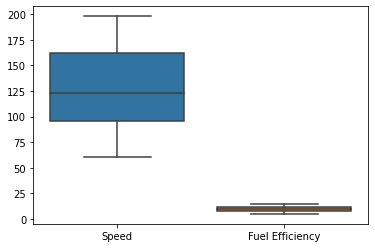

In [8]:
sns.boxplot(data=data);

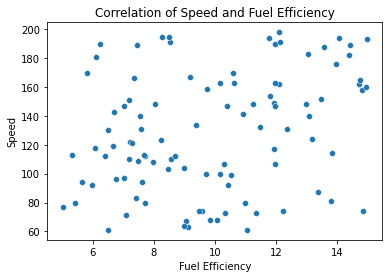

In [9]:
sns.scatterplot(data=data, x='Fuel Efficiency', y='Speed')
plt.title('Correlation of Speed and Fuel Efficiency')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Speed')
plt.show()

# Veri Ön İşleme

In [11]:
# Bağımsız değişkeni standartlaştıralım.
lbe = StandardScaler()
data['Speed'] = lbe.fit_transform(data['Speed'].values.reshape(-1, 1))

In [12]:
data.head(1)

,Speed,Fuel Efficiency
0,0.826498,14.717121


# Model 

In [16]:
# Bağımlı ve bağımsız değişkeni oluşturalım.
X = data['Speed'].values.reshape(-1, 1)
y = data['Fuel Efficiency']

In [17]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Modeli oluşturalım ve eğitelim.
model = LGBMRegressor().fit(X_train, y_train)

In [19]:
# Tahmin 
predict = model.predict(X_test)

In [20]:
# Modeli değerlendirelim.
r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  -0.05264751333488604
MSE:  7.783294915811166
RMSE:  2.789855715948616


# Model Tuning

In [26]:
params = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 50],
}

grid = GridSearchCV(estimator=LGBMRegressor(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

print('Best Parameters: ', best_params)
print('Best Score: ', best_score)

Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 20}
Best Score:  -0.18413525891838736


In [27]:
result = pd.DataFrame({
    'Gerçek Değerler': y_test,
    'Tahmini Değerler': predict
})
result.head()

,Gerçek Değerler,Tahmini Değerler
83,8.486660,11.034780
53,6.480869,9.401568
70,9.703006,9.189988
45,7.187642,12.283821
44,6.682910,9.993013
